#**Convolution Neural Networks Basics**

Convolutions Helps Neural Networks in reducing no of parameters as it shares parameters across neurons and acts as a feature detector (e.g vertical/horizontal edge detector).

##<h2>Filter 
<h5>A transformation filter is used to learn the shared information in image pixels.

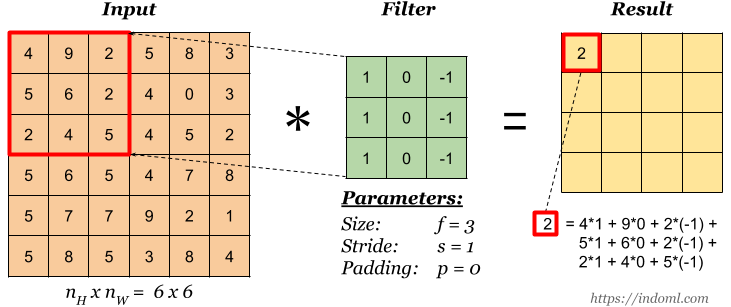

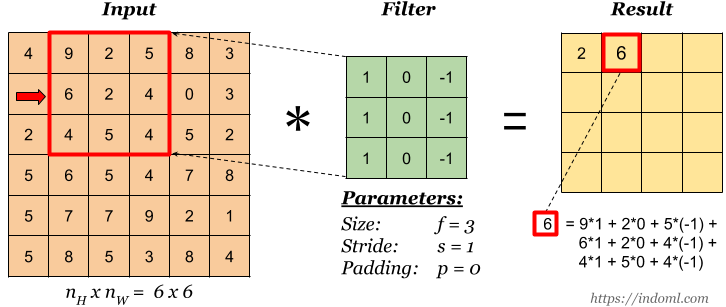

##<h2>Stride 
<h5>how many cells filter is moved next in one step.

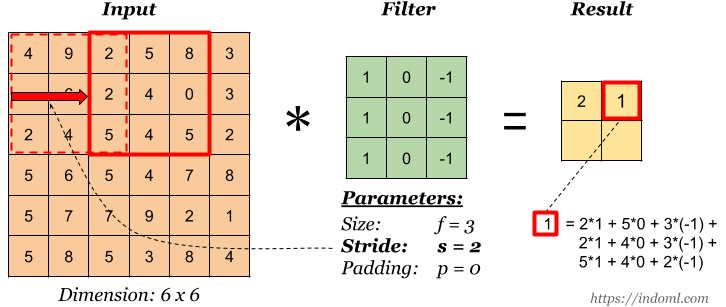

##<h2>Padding 
<h5>how many cells to add to border of image so that output image size remains same.

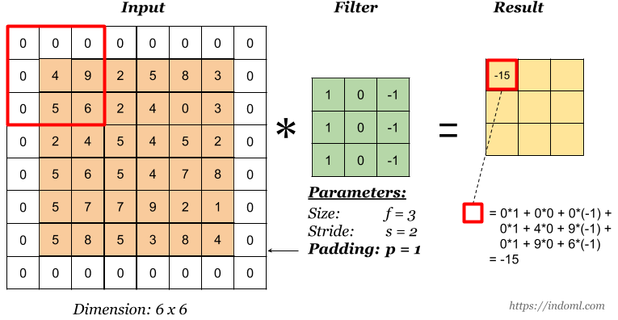

##<h2>Output Shape size</h2>


<p>
The formulas relating the output shape of the convolution to the input shape is:
<p>
$ n_H = \displaystyle\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $
<p>$ n_W = \displaystyle\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $

In [1]:
import numpy as np 
import pandas as pd 
import math
import zipfile
import matplotlib.pyplot as plt
import cv2 as cv2
import tensorflow as tf

In [2]:
#from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##<H2>Read Image

In [3]:
#Read image in Grayscale
im = cv2.imread('/content/drive/MyDrive/dog.jpg',cv2.IMREAD_GRAYSCALE)
im=cv2.resize(im, (100,100))


In [5]:
#img = files.upload()

##<h2> View Image

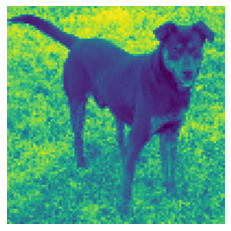

In [6]:
plt.axis('off')
im = cv2.imread('/content/drive/MyDrive/dog.jpg', cv2.IMREAD_GRAYSCALE)
im=cv2.resize(im, (100,100))
plt.imshow(im)
plt.show()

##<h2> View Image Data

In [7]:
print('Image Size=',im.shape)

Image Size= (100, 100)


##<h2>Padding and Stride

In [8]:
#Filters
vfilter=np.array([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]) # [-1 0 1]
hfilter=np.array([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]) # [-1 0 1]
f=len(vfilter)                                          # [-1 0 1]

#Padding
pad=1
padImg=np.pad(im, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))

#Stride
stride=1

#Out image size calculations
n_H_prev,n_W_prev=im.shape
n_H = int((n_H_prev - f + 2 * pad) / stride + 1)     
n_W = int((n_W_prev - f + 2 * pad) / stride + 1)
outImg=np.zeros((n_W,n_H))


print('out Image Size=',outImg.shape)

out Image Size= (100, 100)


##<h2>Apply Filter Vertical/Horizontal Edge Detecter

Output Image Size= (100, 100)
Output Image Size= (100, 100)


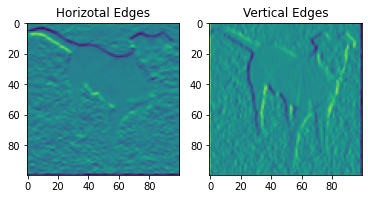

In [9]:
filter=hfilter
for i in range(n_H):
    for j in range(n_W):
        outImg[i,j]= np.sum(np.multiply(padImg[i*stride:i*stride+f,j*stride:j*stride+f],filter))
print('Output Image Size=',outImg.shape)
plt.subplot('121') # row, col, position
plt.imshow(outImg)
plt.title('Horizotal Edges')

filter=vfilter
for i in range(n_H):
    for j in range(n_W):
        outImg[i,j]= np.sum(np.multiply(padImg[i*stride:i*stride+f,j*stride:j*stride+f],filter))
print('Output Image Size=',outImg.shape)
plt.subplot('122') # row, col, position
plt.imshow(outImg)
plt.title('Vertical Edges')

plt.show()

##<h2>Read Color Image

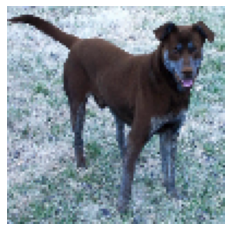

In [10]:
#Read image in Grayscale
clrImg = cv2.imread('/content/drive/MyDrive/dog.jpg')
clrImg=cv2.resize(clrImg, (100,100))
plt.axis('off')
plt.imshow(clrImg)
plt.show()

##<h2>Notation</h2>

<p>   $X$ will have dimensions $ (m,n_{H}, n_{W} , n_{C})$
<p> $m$= No of images in dataset
<p>$n_{H}$= Height(No of pixels vertically) in image
<p>$n_{W}$= Width(No of pixels vertically) in image
<p>$n_{C}$= Height(No of Channels RGB) in image


##<h2>Converting Image to input X

In [11]:
X=np.array([clrImg])     # X=np.array([clrImg1,clrImg2,clrImg3,.....so on])
X.shape

(1, 100, 100, 3)

##<h1> Pooling

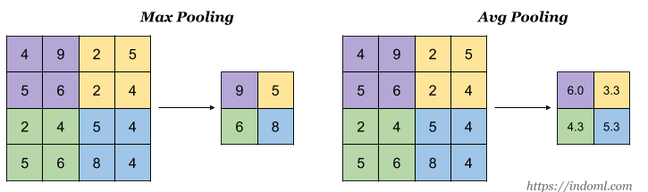

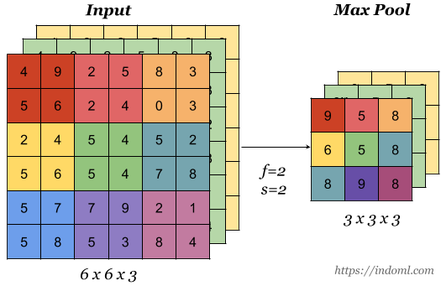

output shape of the pooling to the input shape is:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

out Image Size= (1, 31, 31, 3)
Output Image Size= (1, 31, 31, 3)


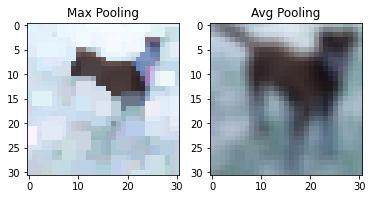

In [12]:

f=10      #Filter size for pooling
stride=3

m,n_H_prev,n_W_prev,n_C_prev=X.shape
n_H = int(1 + (n_H_prev - f) / stride) # 1 + ((100-10)/3) = 1 + 30 = 31
n_W = int(1 + (n_W_prev - f) / stride) # 1 + ((100-10)/3) = 1 + 30 = 31
n_C = n_C_prev
                  
X_Max=np.zeros((m,n_W,n_H,n_C))
X_Avg=np.zeros((m,n_W,n_H,n_C))
print('out Image Size=',X_Max.shape)

for i in range(m):                         # loop over the training examples
    for h in range(n_H):                 # loop on the vertical axis of the output volume
        for w in range(n_W):                 # loop on the horizontal axis of the output volume
            for c in range (n_C):                # loop over the channels of the output volume
                X_Slice=X[i,h*stride:h*stride+f,w*stride:w*stride+f,c]
                X_Max[i,h,w,c]= np.max(X_Slice)
                X_Avg[i,h,w,c]= np.mean(X_Slice)
                

print('Output Image Size=',X_Max.shape)
plt.subplot('121')
plt.imshow((X_Max[0,:,:,:]).astype(int))
plt.title('Max Pooling')

plt.subplot('122')
plt.imshow((X_Avg[0,:,:,:]).astype(int))
plt.title('Avg Pooling')
plt.show()
                
                

---

#**Keras Implemetation of CIFAR Dataset**

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Import Dataset

In [15]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [16]:
print("x_train shape: ", y_train.shape)
x_train.shape

x_train shape:  (50000, 1)


(50000, 32, 32, 3)

In [17]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

Sample Image

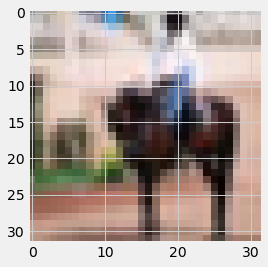

In [18]:
plt.imshow(x_train[11])

In [19]:
print(y_train<0)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


Categorical Classes within the Dataset

In [20]:
classification = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print("Image Belongs To : ", classification[y_train[11]])

Image Belongs To :  ['horse']


In [21]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test) # => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [22]:
y_train_one_hot.shape

(50000, 10)

Normalizing data values between 0 to 1

In [23]:
x_train = x_train/255
x_test = x_test/255

Preparing Sequential Model

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

Compling Model

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training of Model Starts

In [27]:
hist = model.fit(x_train, y_train_one_hot,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 122s 194ms/step - loss: 1.6128 - accuracy: 0.4087 - val_loss: 1.2781 - val_accuracy: 0.5411
Epoch 2/10
625/625 [==============================] - 121s 194ms/step - loss: 1.2172 - accuracy: 0.5660 - val_loss: 1.0580 - val_accuracy: 0.6220
Epoch 3/10
625/625 [==============================] - 122s 195ms/step - loss: 1.0519 - accuracy: 0.6284 - val_loss: 0.9241 - val_accuracy: 0.6724
Epoch 4/10
625/625 [==============================] - 121s 194ms/step - loss: 0.9399 - accuracy: 0.6696 - val_loss: 0.9016 - val_accuracy: 0.6825
Epoch 5/10
625/625 [==============================] - 121s 194ms/step - loss: 0.8550 - accuracy: 0.6973 - val_loss: 0.8473 - val_accuracy: 0.7036
Epoch 6/10
625/625 [==============================] - 121s 194ms/step - loss: 0.7896 - accuracy: 0.7240 - val_loss: 0.7779 - val_accuracy: 0.7317
Epoch 7/10
625/625 [==============================] - 122s 195ms/step - loss: 0.7373 - accuracy: 0.7400 - val_loss: 0.7400 -

Evaluating the accuracy of Model

In [28]:
model.evaluate(x_test, y_test_one_hot)[0]

313/313 [==============================] - 7s 23ms/step - loss: 0.7679 - accuracy: 0.7448


0.7678954601287842

Plotting Train Vs Validation Accuracy Graph

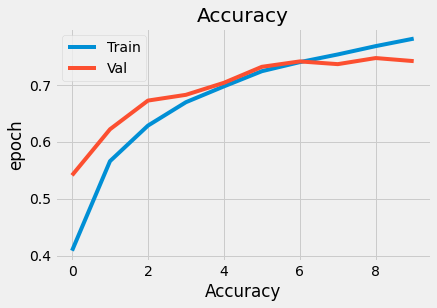

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Accuracy')
plt.ylabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

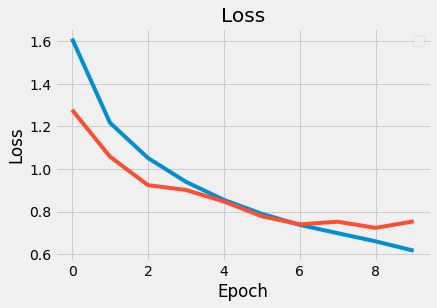

In [30]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

---

#**Data Augmentation**

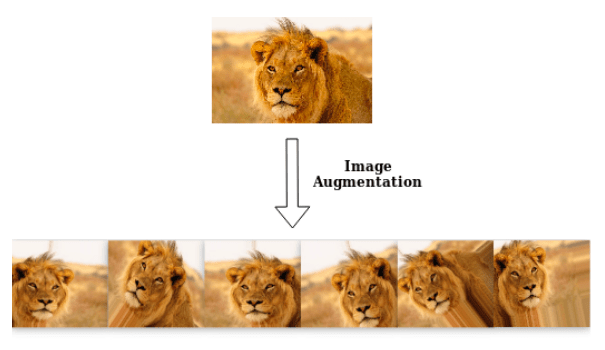

1. Used to increase the amount of data.
2. Adds modified copies of existing data.
3. Helps to reduce overfitting 
4. Closely related to oversampling in data analysis.




##Data Augmentation without the use of Keras

In [ ]:
#Translation
import numpy as np
import cv2
import matplotlib.pyplot as plt

path=input("Input path address:")
x=int(input("Enter your x0:"))
y=int(input("Enter your y0:"))

img=cv2.imread(path)
M=np.float32([[1,0,x],[0,1,y]])
shifted=cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_RGB2BGR))

Input path address:1
Enter your x0:2
Enter your y0:3


AttributeError: ignored

Input path address:/content/car.jpg
Enter your angle :45
Enter your reduction factor:0.5


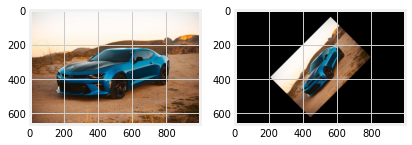

In [ ]:
#Rotation
import numpy as np
import cv2
import matplotlib.pyplot as plt

path=input("Input path address:")
angle=int(input("Enter your angle :"))
reduction=float(input("Enter your reduction factor:"))
img=cv2.imread(path)

(h,w)=img.shape[:2]
center=(w/2,h/2)

M=cv2.getRotationMatrix2D(center,angle,reduction)
rotate=cv2.warpAffine(img,M,(w,h))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(rotate, cv2.COLOR_RGB2BGR))

Input path address:/content/car.jpg
Enter your scaling parameter:50
(667, 1000, 3)


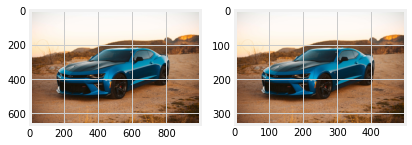

In [ ]:
#Scaling
import numpy as np
import cv2
import matplotlib.pyplot as plt

path=input("Input path address:")
s=float(input("Enter your scaling parameter:"))
img=cv2.imread(path)

print(img.shape)


Width = int(img.shape[1] * s/100 )
Height = int(img.shape[0] * s/100)
dim = (Width, Height)
scale=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)


plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(scale, cv2.COLOR_RGB2BGR))

Input path address:/content/car.jpg


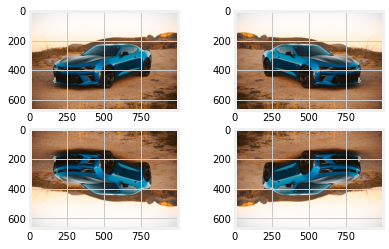

In [ ]:
#Flippig
import numpy as np
import cv2
import matplotlib.pyplot as plt

path=input("Input path address:")
img=cv2.imread(path)

flipH=cv2.flip(img,1)
flipV=cv2.flip(img,0)
flipHV=cv2.flip(img,-1)

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(flipH, cv2.COLOR_RGB2BGR))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(flipV, cv2.COLOR_RGB2BGR))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(flipHV, cv2.COLOR_RGB2BGR))

Input path address:/content/car.jpg
Enter x1 to be cropped: 2
Enter x2 to be cropped: 100
Enter y1 to be cropped: 3
Enter y2 to be cropped: 200


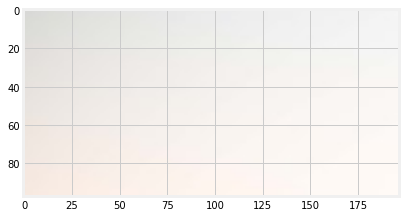

In [ ]:
#Cropping
import numpy as np
import cv2
import matplotlib.pyplot as plt

path=input("Input path address:")
x1=int(input("Enter x1 to be cropped: "))
x2=int(input("Enter x2 to be cropped: "))
y1=int(input("Enter y1 to be cropped: "))
y2=int(input("Enter y2 to be cropped: "))
img=cv2.imread(path)

crop=img[x1:x2,y1:y2]
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))

##Data Augmentation using Keras inbuilt function

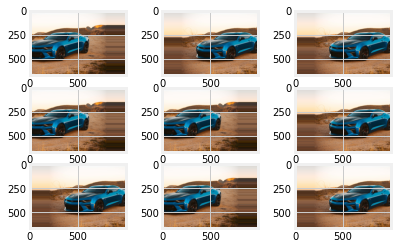

In [ ]:
# example image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/car.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])#height_shift_range=0.5,brightness_range=[0.2,1.0],
#rotation_range=90,zoom_range=[0.5,1.0],horizontal_flip=True
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()